# Part 1: Image processing

In [1]:
# Import Libraries
import numpy as np
import matplotlib.pyplot as plt
from tifffile import imread, imsave
import skimage.measure 
import pickle as pkl
import os

# Import FoamQuant library
from FoamQuant import *

# Set matplotlib default font size
plt.rc('font', size=20) 

In [2]:
# Create the processing pipeline
ProcessPipeline = ['P1_Raw','P2_PhaseSegmented','P3_Cleaned','P4_BubbleSegmented','P5_BubbleNoEdge']

for Pi in ProcessPipeline:
    if  os.path.exists(Pi):
        print('path already exist:',Pi)
    else:
        print('Created:',Pi)
        os.mkdir(Pi)

path already exist: P1_Raw
path already exist: P2_PhaseSegmented
path already exist: P3_Cleaned
path already exist: P4_BubbleSegmented
path already exist: P5_BubbleNoEdge


## A) The raw image

In [3]:
# Read/Save image names and directories
nameread = 'Raw_'
namesave = 'PhaseSegmented_'
dirread = ProcessPipeline[0]+'/'
dirsave = ProcessPipeline[1]+'/'
# Images indexes
imrange = [1,2,3,4,5,6,7,8,9,10]

In [4]:
# Read the first image of the series
Raw = imread(dirread+nameread+strindex(imrange[0], 3)+'.tiff')

/gpfs/offline1/staff/tomograms/users/flosch/Rheometer_Jupyter/FoamQuant/Figure.py:78: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  plt.tight_layout()


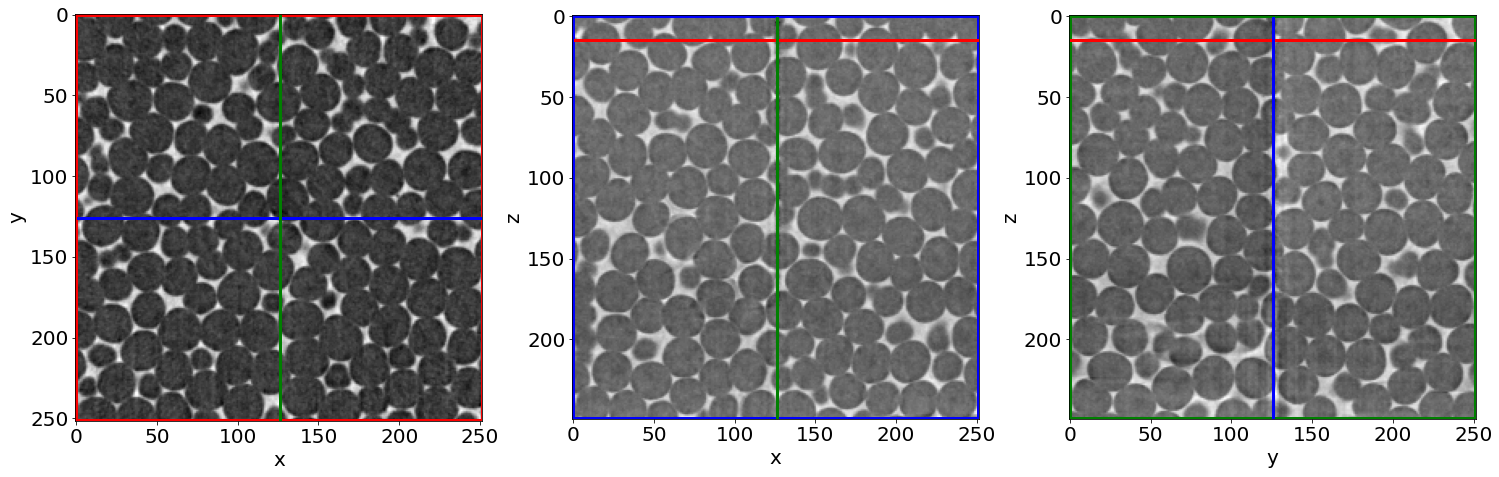

In [5]:
# Show a 3D-cut view of the volume
Cut3D(Raw, 
      showcuts=True, 
      showaxes=True, 
      figblocksize=7,
      zcut=15,       # tune this parrameter if you wish
      ycut=False,    # tune this parrameter if you wish
      xcut=False)    # tune this parrameter if you wish

## B) Phase segmentation

In [6]:
# Otsu simple threshold phase segmentation of the whole series
th = PhaseSegmentation_Batch(nameread, 
                             namesave, 
                             dirread, 
                             dirsave, 
                             imrange, 
                             method='ostu_global',
                             returnOtsu=True, 
                             verbose=True, 
                             n0=3, 
                             endread='.tiff', 
                             endsave='.tiff')

PhaseSegmented_ 1: done

PhaseSegmented_ 2: done

PhaseSegmented_ 3: done

PhaseSegmented_ 4: done

PhaseSegmented_ 5: done

PhaseSegmented_ 6: done

PhaseSegmented_ 7: done

PhaseSegmented_ 8: done

PhaseSegmented_ 9: done

PhaseSegmented_ 10: done



In [7]:
# Otsu thresholds
print('Otsu thresholds:',th)

Otsu thresholds: [137, 140, 138, 141, 141, 141, 143, 143, 139, 139]


Let's see the result...

In [8]:
# Read the first image of the series
Seg = imread(dirsave+namesave+strindex(imrange[0], 3)+'.tiff')

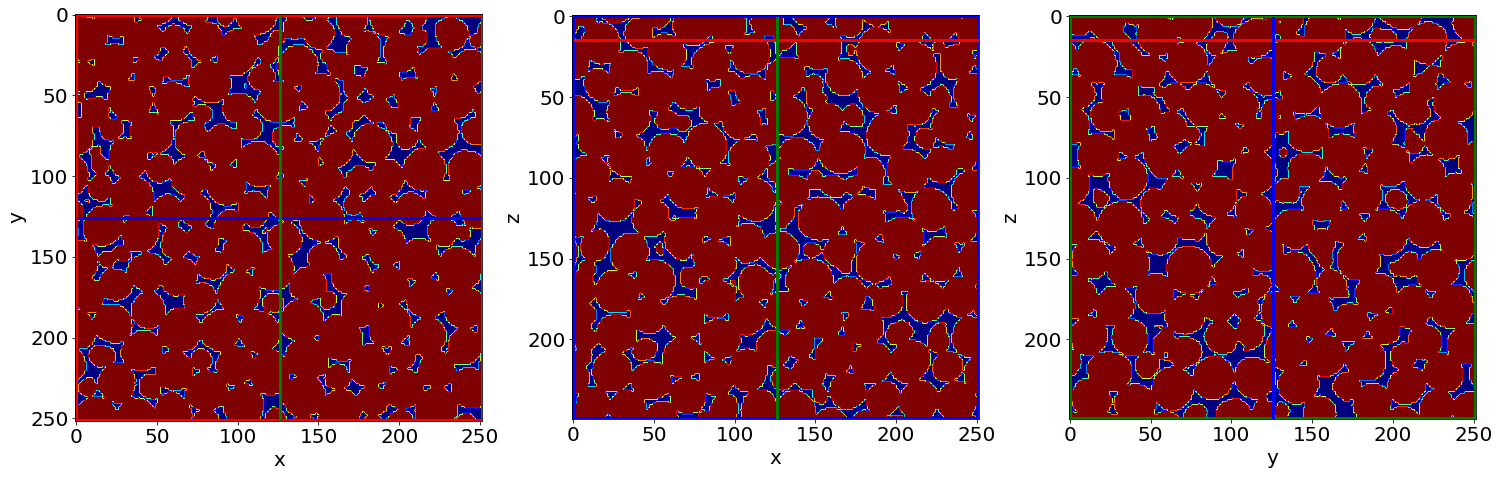

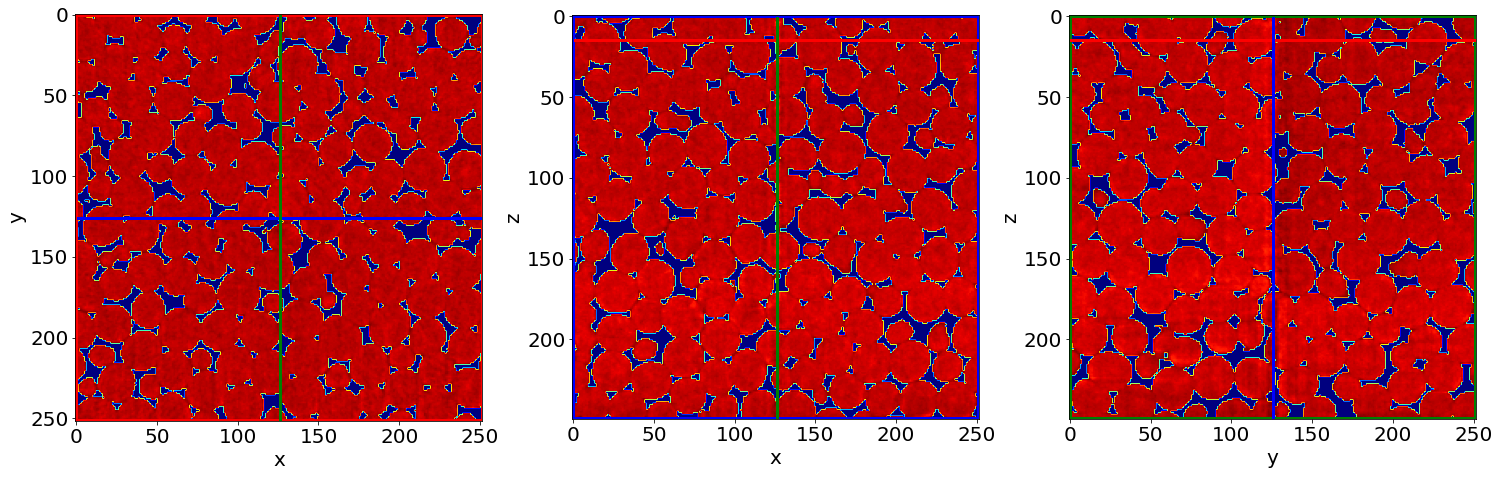

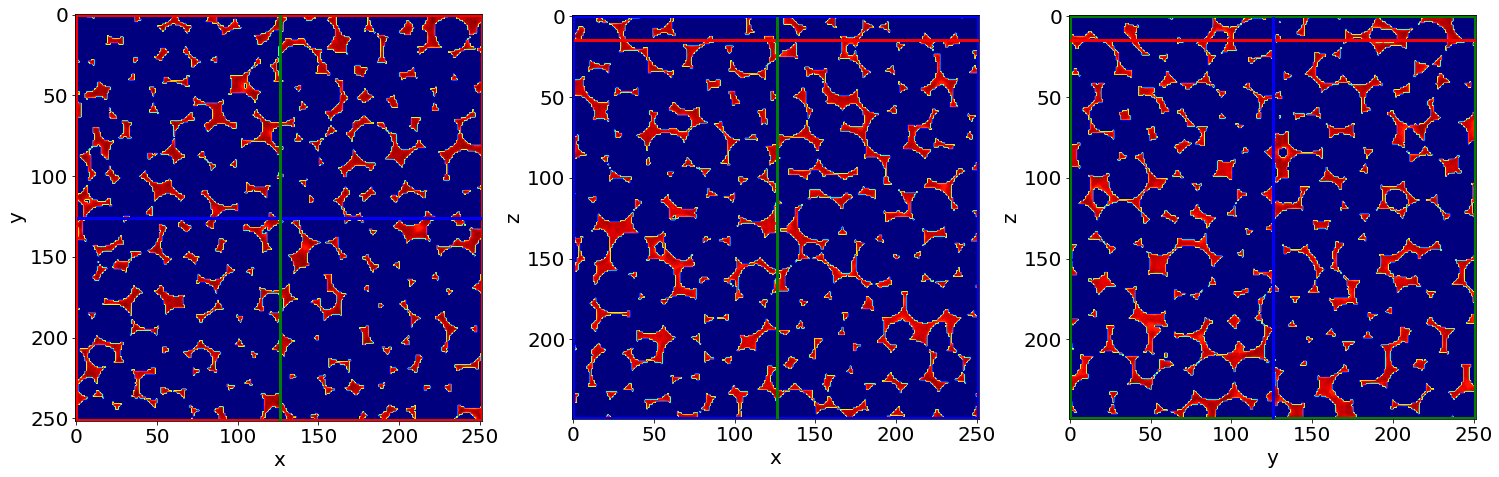

In [9]:
zcut=15       # tune this parrameter if you wish
ycut=False    # tune this parrameter if you wish
xcut=False    # tune this parrameter if you wish
cmap='jet'    # tune this parrameter if you wish: e.g. 'bone'

# Show a 3D-cut view of the volume
Cut3D(Seg, showcuts=True, showaxes=True, figblocksize=7,zcut=zcut,ycut=ycut,xcut=xcut, cmap=cmap)             # Phase segmented image
Cut3D((Seg>0)*Raw, showcuts=True, showaxes=True, figblocksize=7,zcut=zcut,ycut=ycut,xcut=xcut, cmap=cmap)     # Phase segmented image * Raw image
Cut3D((1-Seg)*Raw, showcuts=True, showaxes=True, figblocksize=7,zcut=zcut,ycut=ycut,xcut=xcut, cmap=cmap)     # (1-Phase segmented image) * Raw image

## C) Remove small holes & regions

In [10]:
# Read/Save image names and directories
nameread = 'PhaseSegmented_'
namesave = 'Cleaned_'
dirread = ProcessPipeline[1]+'/'
dirsave = ProcessPipeline[2]+'/'
# Images indexes
imrange = [1,2,3,4,5,6,7,8,9,10]

Remove all holes and objects with:
- Vobj < Cobj * max(Vobj)
- Vhole < Chole * max(Vhole)

Since in liquid foam images, the liquid and gas phases both consist of unique large regions, 
Cobj and Chole can be strict (large thresholds). All the other smaller regions are often due to imaging artefacts.

In [11]:
# remove holes and objects
RemoveSpeckleBin_Batch(nameread, 
                       namesave, 
                       dirread, 
                       dirsave, 
                       imrange, 
                       verbose=True, 
                       endread='.tiff', 
                       endsave='.tiff', 
                       n0=3, 
                       Cobj=0.1,  # tune this parrameter if you wish
                       Chole=0.1) # tune this parrameter if you wish

Before: Nobj 9
After: Nobj 1
Before: Nobj 20
After: Nobj 1
First image (vox): maxObj 13524383 maxHole 2351568
Thresholds (vox): thrObj 1352438 thrHole 235157 

Before: Nhol 9
After: Nhol 1
Before: Nhol 20
After: Nhol 1
Cleaned_001: done

Before: Nhol 6
After: Nhol 1
Before: Nhol 21
After: Nhol 1
Cleaned_002: done

Before: Nhol 9
After: Nhol 1
Before: Nhol 26
After: Nhol 1
Cleaned_003: done

Before: Nhol 8
After: Nhol 1
Before: Nhol 28
After: Nhol 1
Cleaned_004: done

Before: Nhol 3
After: Nhol 1
Before: Nhol 22
After: Nhol 1
Cleaned_005: done

Before: Nhol 4
After: Nhol 1
Before: Nhol 41
After: Nhol 1
Cleaned_006: done

Before: Nhol 8
After: Nhol 1
Before: Nhol 19
After: Nhol 1
Cleaned_007: done

Before: Nhol 6
After: Nhol 1
Before: Nhol 23
After: Nhol 1
Cleaned_008: done

Before: Nhol 1


/gpfs/offline1/staff/tomograms/users/flosch/Rheometer_Jupyter/FoamQuant/Process.py:199: UserWarning: Only one label was provided to `remove_small_objects`. Did you mean to use a boolean array?
  image = remove_small_objects(label(image), min_size=Vminobj)


After: Nhol 1
Before: Nhol 19
After: Nhol 1
Cleaned_009: done

Before: Nhol 8
After: Nhol 1
Before: Nhol 26
After: Nhol 1
Cleaned_010: done



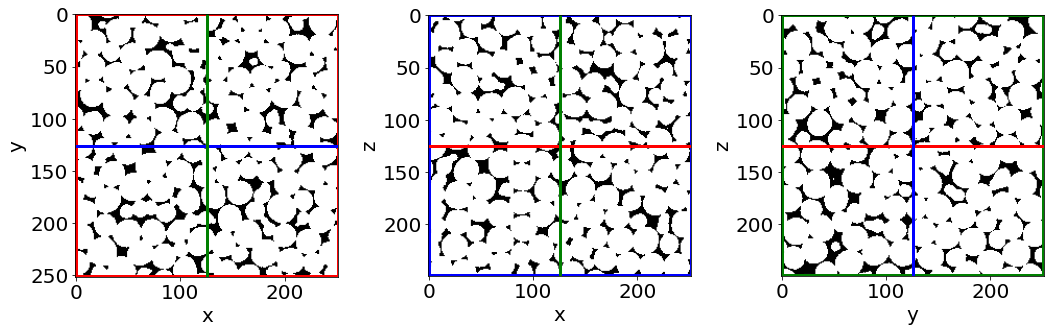

In [12]:
## Let's see the result...
# Read the first image of the series
Cleaned = imread(dirsave+namesave+strindex(imrange[1], 3)+'.tiff')
# Show a 3D-cut view of the volume
Cut3D(Cleaned, showcuts=True, showaxes=True)

... we cannot see much like this

Let's check again the number of objects and holes in the images

In [13]:
for imi in imrange:
    # Read the "non-cleaned" image
    NoCleaned = imread(dirread+nameread+strindex(imi, 3)+'.tiff') 
    # regprops of obj and holes
    regions_obj=skimage.measure.regionprops(skimage.measure.label(NoCleaned))
    regions_holes=skimage.measure.regionprops(skimage.measure.label(NoCleaned<1))
    # number of obj and holes
    print(nameread+strindex(imi, 3),'Number of objects:',len(regions_obj), 'Number of holes:',len(regions_holes))

PhaseSegmented_001 Number of objects: 9 Number of holes: 20
PhaseSegmented_002 Number of objects: 6 Number of holes: 21
PhaseSegmented_003 Number of objects: 9 Number of holes: 26
PhaseSegmented_004 Number of objects: 8 Number of holes: 28
PhaseSegmented_005 Number of objects: 3 Number of holes: 22
PhaseSegmented_006 Number of objects: 4 Number of holes: 41
PhaseSegmented_007 Number of objects: 8 Number of holes: 19
PhaseSegmented_008 Number of objects: 6 Number of holes: 23
PhaseSegmented_009 Number of objects: 1 Number of holes: 19
PhaseSegmented_010 Number of objects: 8 Number of holes: 26


In [14]:
for imi in imrange:
    # Read the "cleaned" image
    Cleaned = imread(dirsave+namesave+strindex(imi, 3)+'.tiff')
    # regprops of obj and holes
    regions_obj=skimage.measure.regionprops(skimage.measure.label(Cleaned))
    regions_holes=skimage.measure.regionprops(skimage.measure.label(Cleaned<1))
    # number of obj and holes
    print(namesave+strindex(imi, 3),'Number of objects:',len(regions_obj), 'Number of holes:',len(regions_holes))

Cleaned_001 Number of objects: 1 Number of holes: 1
Cleaned_002 Number of objects: 1 Number of holes: 1
Cleaned_003 Number of objects: 1 Number of holes: 1
Cleaned_004 Number of objects: 1 Number of holes: 1
Cleaned_005 Number of objects: 1 Number of holes: 1
Cleaned_006 Number of objects: 1 Number of holes: 1
Cleaned_007 Number of objects: 1 Number of holes: 1
Cleaned_008 Number of objects: 1 Number of holes: 1
Cleaned_009 Number of objects: 1 Number of holes: 1
Cleaned_010 Number of objects: 1 Number of holes: 1


## D) Labelled images

In [15]:
# Read/Save image names and directories
nameread = 'Cleaned_'
namesave = 'BubbleSeg_'
dirread = ProcessPipeline[2]+'/'
dirsave = ProcessPipeline[3]+'/'
# Images indexes
imrange = [1,2,3,4,5,6,7,8,9,10]

In [16]:
# Segment the bubbles with default parrameters 
# for more parrameters, try help(BubbleSegmentation_Batch)
BubbleSegmentation_Batch(nameread, 
                         namesave, 
                         dirread, 
                         dirsave, 
                         imrange, 
                         verbose=True, 
                         endread='.tiff', 
                         endsave='.tiff', 
                         n0=3)

Path exist: True
Distance map: done
Seeds distance map: done
Seeds: done
Watershed distance map: done
Watershed: done
BubbleSeg_001: done

Distance map: done
Seeds distance map: done
Seeds: done
Watershed distance map: done
Watershed: done
BubbleSeg_002: done

Distance map: done
Seeds distance map: done
Seeds: done
Watershed distance map: done
Watershed: done
BubbleSeg_003: done

Distance map: done
Seeds distance map: done
Seeds: done
Watershed distance map: done
Watershed: done
BubbleSeg_004: done

Distance map: done
Seeds distance map: done
Seeds: done
Watershed distance map: done
Watershed: done
BubbleSeg_005: done

Distance map: done
Seeds distance map: done
Seeds: done
Watershed distance map: done
Watershed: done
BubbleSeg_006: done

Distance map: done
Seeds distance map: done
Seeds: done
Watershed distance map: done
Watershed: done
BubbleSeg_007: done

Distance map: done
Seeds distance map: done
Seeds: done
Watershed distance map: done
Watershed: done
BubbleSeg_008: done

Distanc

Number of labels: 5000


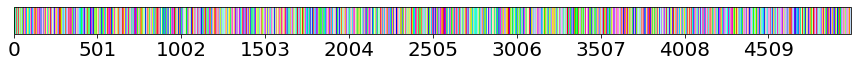

In [17]:
# Create a random colormap
rcmap = RandomCmap(5000)

Let's see the result...

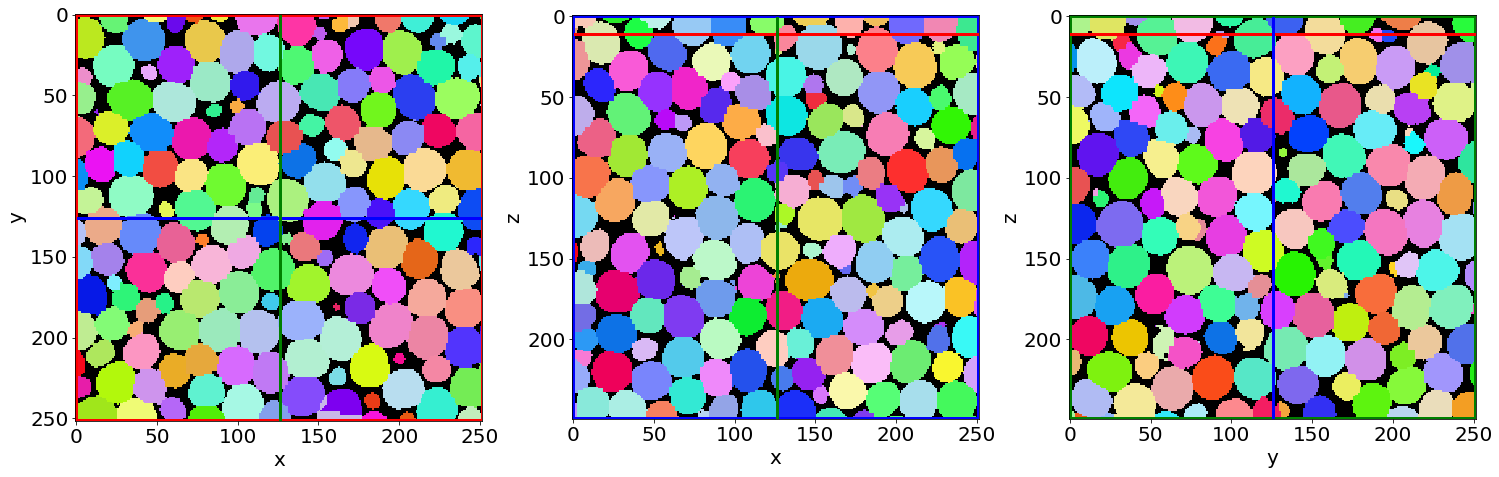

In [18]:
# Read the first image of the series
Lab = imread(dirsave+namesave+strindex(imrange[0], 3)+'.tiff')
# Show a 3D-cut view of the volume
Cut3D(Lab, 
      showcuts=True, 
      showaxes=True, 
      cmap=rcmap, 
      interpolation='nearest', 
      figblocksize=7,           # tune this parrameter if you wish
      zcut=11,                  # tune this parrameter if you wish
      ycut=False,               # tune this parrameter if you wish
      xcut=False)               # tune this parrameter if you wish

## E) Visualize the result in Parraview

In [19]:
# Create a .json random colormap that can be used in ParaView
json_rand_dictionary(Ncolors=5000, namecmap='random_cmap.json', dirsave = dirsave, first_color_black=True)

Download your 'random_cmap.json' and vizualize your bubble-segmented image in Paraview

# Part 2: Quantification

In [20]:
# Create the quantification folders
QuantFolders = ['Q1_LiquidFraction','Q2_RegProps','Q3_Tracking','Q4_MergedTracking']

for Qi in QuantFolders:
    if os.path.exists(Qi):
        print('path already exist:',Qi)
    else:
        print('Created:',Qi)
        os.mkdir(Qi)

path already exist: Q1_LiquidFraction
path already exist: Q2_RegProps
path already exist: Q3_Tracking
path already exist: Q4_MergedTracking


## A) Liquid fraction

In [21]:
# Read/Save names and directories
nameread = 'Cleaned_'
namesave = 'LFGlob_'
dirread = ProcessPipeline[2]+'/'
dirsave = QuantFolders[0]+'/'
# Images indexes
imrange = [1,2,3,4,5,6,7,8,9,10]

### 1) Whole images liquid fraction

In [22]:
# Get the whole images liquid fraction 
# (volume percentage of liquid)
LiqFrac_Batch(nameread, 
              namesave, 
              dirread, 
              dirsave, 
              imrange, 
              TypeGrid='Global', 
              verbose=10, 
              structured=False)

Path exist: True
Liquid fraction image 1: done
crop:None
LiqFrac:0.14812106324011087
LFGlob_001: done
Liquid fraction image 2: done
crop:None
LiqFrac:0.14536507936507936
LFGlob_002: done
Liquid fraction image 3: done
crop:None
LiqFrac:0.14993783068783068
LFGlob_003: done
Liquid fraction image 4: done
crop:None
LiqFrac:0.14911722096245905
LFGlob_004: done
Liquid fraction image 5: done
crop:None
LiqFrac:0.14338044847568657
LFGlob_005: done
Liquid fraction image 6: done
crop:None
LiqFrac:0.14822921390778535
LFGlob_006: done
Liquid fraction image 7: done
crop:None
LiqFrac:0.14275831443688586
LFGlob_007: done
Liquid fraction image 8: done
crop:None
LiqFrac:0.14482527084908037
LFGlob_008: done
Liquid fraction image 9: done
crop:None
LiqFrac:0.1425321869488536
LFGlob_009: done
Liquid fraction image 10: done
crop:None
LiqFrac:0.14275472411186696
LFGlob_010: done


In [23]:
## Let's see the result...
# Read the liquid fraction of the first image of the series
with open(dirsave + namesave + '001' + '.pkl','rb') as f:
    LF = pkl.load(f)['lf']

In [24]:
print('Whole image liquid fraction:',LF,'%')

Whole image liquid fraction: 0.14812106324011087 %


### 2) Stuctured liquid fraction in Cartesian subvolumes

In [25]:
# Read/Save image names and directories
nameread = 'Cleaned_'
namesave = 'LFCartesMesh_'
dirread = ProcessPipeline[2]+'/'
dirsave = QuantFolders[0]+'/'
# Images indexes
imrange = [1,2,3,4,5,6,7,8,9,10]

In [26]:
# Get liquid fraction in cartesian subvolumes
# (volume percentage of liquid in each subvolumes)
LiqFrac_Batch(nameread, 
              namesave, 
              dirread, 
              dirsave, 
              imrange, 
              TypeGrid='CartesMesh', 
              Nz=10,        # tune this parrameter if you wish
              Ny=10,        # tune this parrameter if you wish
              Nx=10,        # tune this parrameter if you wish
              verbose=1,
              structured=True)

Path exist: True
LFCartesMesh_001: done
LFCartesMesh_002: done
LFCartesMesh_003: done
LFCartesMesh_004: done
LFCartesMesh_005: done
LFCartesMesh_006: done
LFCartesMesh_007: done
LFCartesMesh_008: done
LFCartesMesh_009: done
LFCartesMesh_010: done


In [27]:
# Read the cartesian grid of liquid fraction
LF=[]
for imi in imrange:
    imifordir = strindex(imi, n0=3)
    with open(dirsave + namesave + imifordir + '.pkl','rb') as f:
        LF.append(pkl.load(f)['lf'])
LF=np.mean(LF,0)

vmin = 0.11 vmax = 0.22
MIN: 0.0943104 MAX: 0.220256
Min0: 0.1130944 Min0: 0.1777792
Min1: 0.101056 Max1 0.20806399999999997
Min2: 0.101056 Max2: 0.21072639999999998


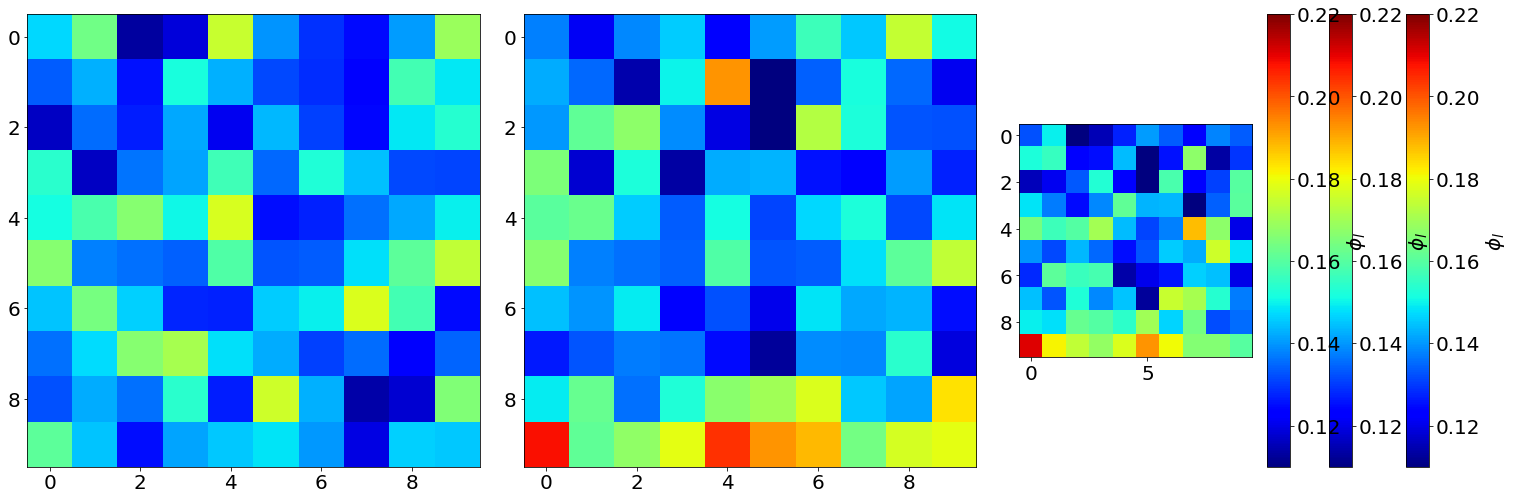

In [28]:
# If "structured=True", the liquid fraction is saved as a 3D mesh by LiqFrac_Batch
# Such as for 3D images, we can reuse Cut3D or Proj3D to vizualise the liquid-fraction meshed volume
fig,ax,neg = Cut3D(LF, 
                   vmin=0.11,    # tune this parrameter if you wish
                   vmax=0.22,   # tune this parrameter if you wish
                   cmap='jet', 
                   printminmax=True, 
                   returnfig=True,
                   figblocksize=7)
# Colorbars
fig.colorbar(neg[1], label=r'$\phi_l$')
fig.colorbar(neg[1], label=r'$\phi_l$')
fig.colorbar(neg[1], label=r'$\phi_l$')

vmin = 0.11 vmax = 0.22
MIN: 0.0943104 MAX: 0.220256
Min0: 0.132816 Min0: 0.16055424
Min1: 0.12508662153846156 Max1 0.1802792426035503
Min2: 0.12507100591715978 Max2: 0.18537196307692308


/gpfs/offline1/staff/tomograms/users/flosch/Rheometer_Jupyter/FoamQuant/Figure.py:140: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  plt.tight_layout()


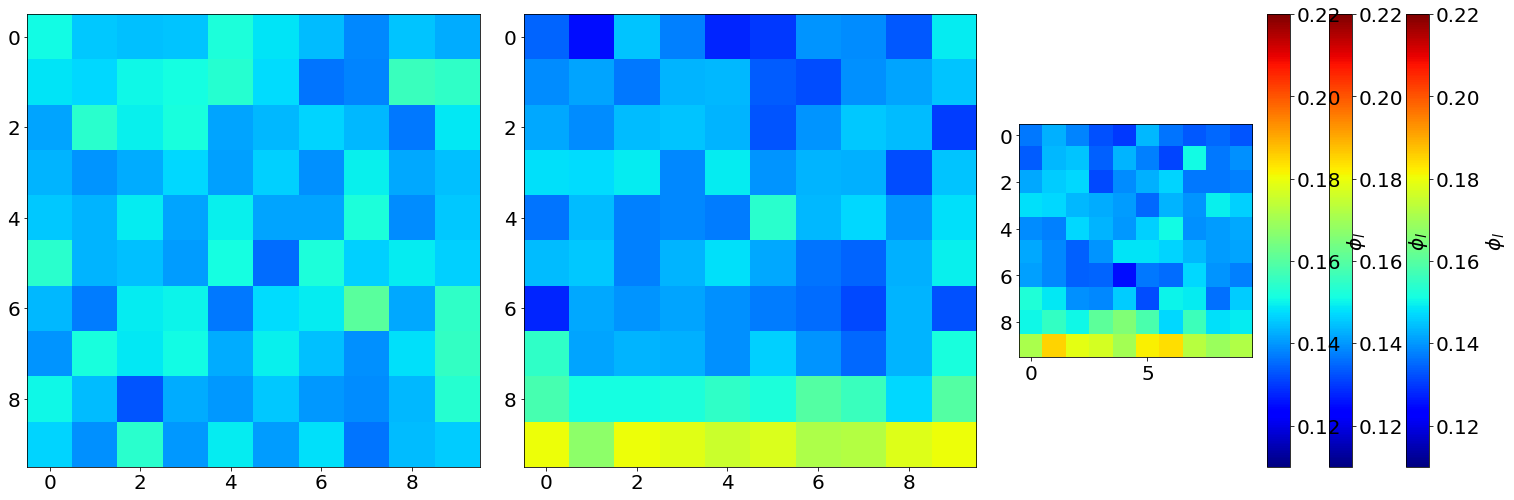

In [29]:
# The Proj3D function is similar to Cut3D, but show an average along the 3 directions
fig,ax,neg = Proj3D(LF, 
                    vmin=0.11,    # tune this parrameter if you wish
                    vmax=0.22,   # tune this parrameter if you wish
                    cmap='jet', 
                    printminmax=True, 
                    returnfig=True,
                    figblocksize=7)

# Colorbars
fig.colorbar(neg[0], label=r'$\phi_l$')
fig.colorbar(neg[1], label=r'$\phi_l$')
fig.colorbar(neg[2], label=r'$\phi_l$')

### 3) Unstuctured liquid fraction in Cartesian subvolumes

If "structured=False", the liquid fraction is saved as a 1D array by LiqFrac_Batch

This may be practical if one want to plot the liquid fraction as a function of other parrameters 
such as the cartesian/cylindrical/spherical coordinates or the bubble deformation, for example.

In [30]:
# structured = False
LiqFrac_Batch(nameread, 
              namesave, 
              dirread, 
              dirsave, 
              imrange, 
              TypeGrid='CartesMesh', 
              Nz=10,      # tune this parrameter if you wish
              Ny=5,       # tune this parrameter if you wish
              Nx=5,       # tune this parrameter if you wish
              verbose=1,
              structured=False)

Path exist: True
LFCartesMesh_001: done
LFCartesMesh_002: done
LFCartesMesh_003: done
LFCartesMesh_004: done
LFCartesMesh_005: done
LFCartesMesh_006: done
LFCartesMesh_007: done
LFCartesMesh_008: done
LFCartesMesh_009: done
LFCartesMesh_010: done


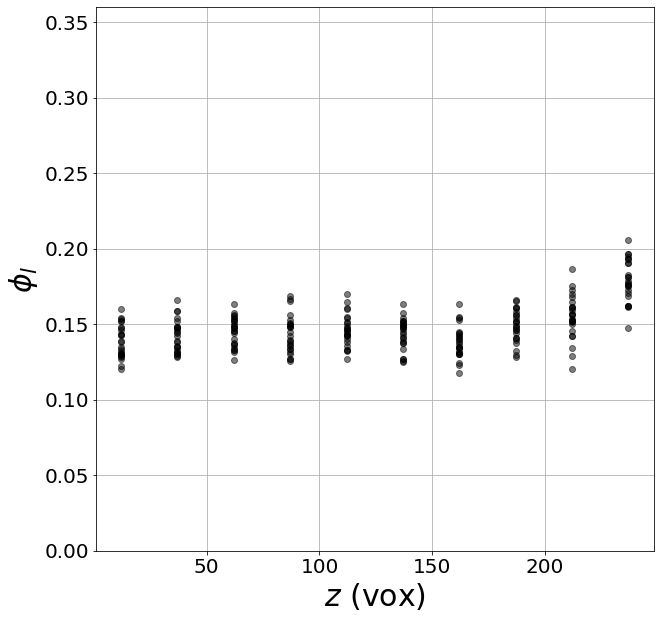

In [31]:
# We can plot the liquid fraction as a function of the z coordinate for the first image
with open(dirsave + namesave + '001' + '.pkl','rb') as f:
    pack = pkl.load(f)
lf = pack['lf']
z = pack['zgrid']

fig, ax = plt.subplots(1,1, figsize = (10, 10))
plt.plot(z, lf,'ko', alpha=0.5)
plt.xlabel(r'$z$ (vox)', fontsize=30)
plt.ylabel(r'$\phi_l$', fontsize=30)
plt.ylim((0,0.36))
plt.grid(True)  

## B) Individual bubble properties

We are going to extract the individual bubble volume, radius, sphericity, moment of inertial, strain tensor, etc.

In [32]:
# Read/Save names and directories
nameread = 'BubbleSeg_'
namesave = 'Props_'
dirread = ProcessPipeline[3]+'/'
dirsave = QuantFolders[1]+'/'
# Images indexes
imrange = [1,2,3,4,5,6,7,8,9,10]

Get some properties in the given field of view 
(field=[zmin,zmax,ymin,ymax,xmin,xmax])

- Label and centroid coodinate: 'lab','z','y','x'
- Volume, equivalent radius, area, sphericity: 'vol','rad','area','sph'
- Volume from ellipsoid fit: 'volfit'
- Ellipsoid three semi-axis and eigenvectors: 'S1','S2','S3','e1z','e1y','e1x','e2z','e2y','e2x','e3z','e3y','e3x',
- Internal strain components: 'U1','U2','U3'
- Internal strain von Mises invariant: 'U'
- Oblate (-1) or prolate (1) ellipsoid:'type'

In [33]:
# Region properties
RegionProp_Batch(nameread,
                 namesave,
                 dirread,
                 dirsave,
                 imrange,
                 verbose=True,
                 field=[40,220,40,220,40,220], # tune this parrameter if you wish
                 endread='.tiff', 
                 endsave='.tsv')

Path exist: True
Props_001: done
Props_002: done
Props_003: done
Props_004: done
Props_005: done
Props_006: done
Props_007: done
Props_008: done
Props_009: done
Props_010: done


In [34]:
# Read the regionprop files
properties = Read_RegionProp(namesave, dirsave, imrange)

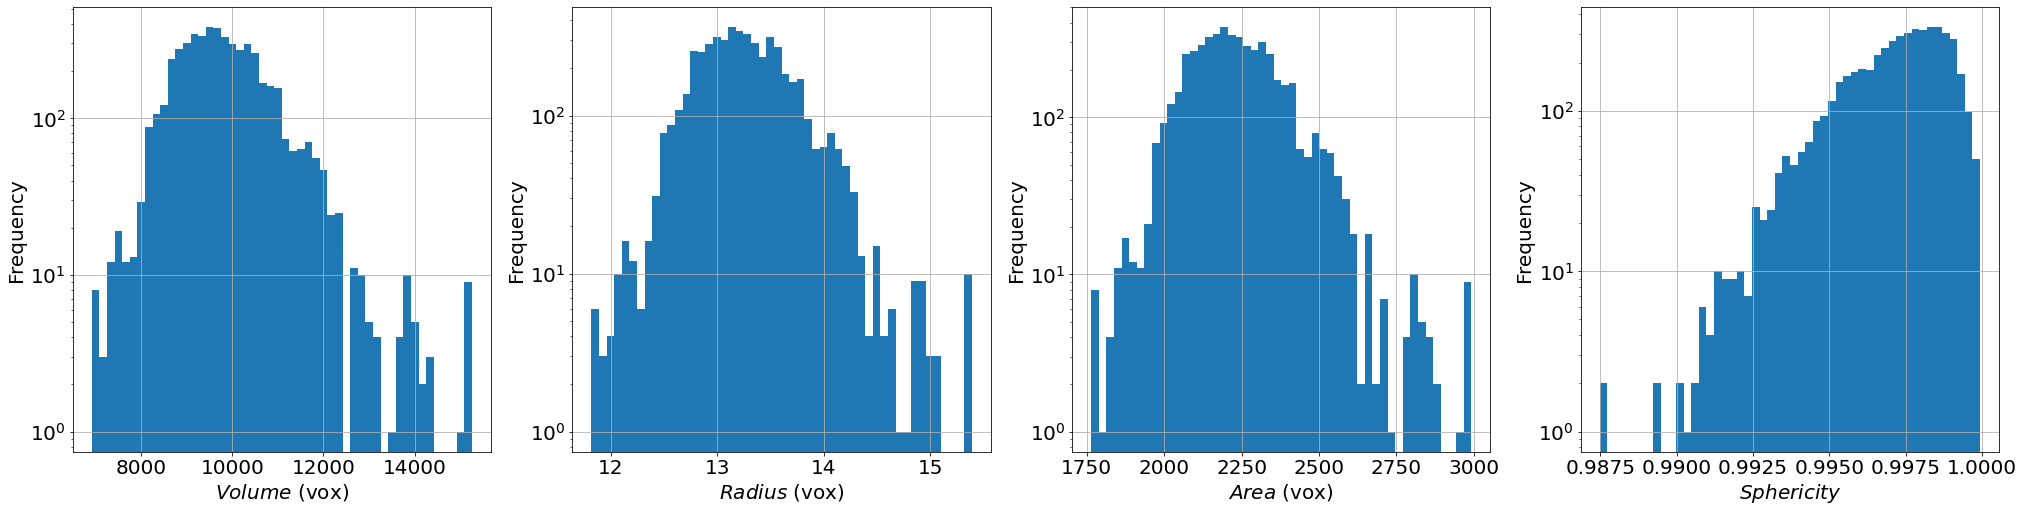

In [35]:
# histogram of some extracted properties
prop=['vol','rad','area','sph']
xlab=[r'$Volume$ (vox)',r'$Radius$ (vox)',r'$Area$ (vox)',r'$Sphericity$']

fig, ax = plt.subplots(1,4, figsize = (7*4, 7), constrained_layout=True)
for i in range(4):
    H=ax[i].hist(properties[prop[i]], bins=50)
    ax[i].set_xlabel(xlab[i], fontsize=20)
    ax[i].set_ylabel(r'Frequency', fontsize=20)
    ax[i].grid(True)
    ax[i].set_yscale('log')   # tune this parrameter if you wish

More properties can be extracted from individual images, such as coordination (number of neighbours and contact topology), and individual contact area and orientation. 

The SPAM package is great for extracting these properties! Have a look here if you wish to know more:  https://ttk.gricad-pages.univ-grenoble-alpes.fr/spam/

## C) Velocity field

### 1) Tracking table

We are going to track the centroid of each bubble from one image to the next

In [36]:
# Read/Save image names and directories
nameread = 'Props_'
namesave = 'Tracking_'
dirread = QuantFolders[1]+'/'
dirsave = QuantFolders[2]+'/'
# Images indexes
imrange = [1,2,3,4,5,6,7,8,9,10]

Track the bubbles from one image to the next:
- keep the bubbles candidate if their centroid is inside the box searchbox=[zmin,zmax,ymin,ymax,xmin,xmax]
- keep the bubbles candidate if the volume from one image to the next is not changing more than Volpercent 
  (the next volume should be between (1-Volpercent)*V and (1+Volpercent)*V)
- select the bubble with the closest distance

In [37]:
# Tracking
LLostlab, LLostX, LLostY, LLostZ = LabelTracking_Batch(nameread, 
                                                       namesave, 
                                                       dirread, 
                                                       dirsave,
                                                       imrange,
                                                       verbose=False,
                                                       endread='.tsv',
                                                       endsave='.tsv',
                                                       n0=3,
                                                       searchbox=[-10,10,-10,10,-10,10],   # tune this parrameter if you wish
                                                       Volpercent=0.05)              # tune this parrameter if you wish

# Lost tracking: N percentage
# Lost tracking: 2 1.2738853503184715 %

Path exist: True
Lost tracking: 13 2.579365079365079 %
Lost tracking: 9 1.7786561264822136 %
Lost tracking: 7 1.36986301369863 %
Lost tracking: 16 3.11284046692607 %
Lost tracking: 11 2.1825396825396823 %
Lost tracking: 12 2.3483365949119372 %
Lost tracking: 9 1.761252446183953 %
Lost tracking: 11 2.156862745098039 %
Lost tracking: 7 1.3806706114398422 %


In [38]:
# Read the tracking files
tracking = Read_LabelTracking(namesave, dirsave, imrange, verbose=True)

Tracking_001_002 : done
Tracking_002_003 : done
Tracking_003_004 : done
Tracking_004_005 : done
Tracking_005_006 : done
Tracking_006_007 : done
Tracking_007_008 : done
Tracking_008_009 : done
Tracking_009_010 : done


In [39]:
# Convert -1 in np.nan 
# and create Coord and v arrays (non-structured coordinate and velocity arrays)
Listx1 = tracking['x1']
Listy1 = tracking['y1']
Listz1 = tracking['z1']

Listx2 = tracking['x2']
Listy2 = tracking['y2']
Listz2 = tracking['z2']

Coord = []; v=[]
for vali in range(len(Listx1)):
    for i in range(len(Listx1[vali])):
        if Listx1[vali][i]==-1:
            Listx1[vali][i]=np.nan
        if Listy1[vali][i]==-1:
            Listy1[vali][i]=np.nan
        if Listz1[vali][i]==-1:
            Listz1[vali][i]=np.nan
        if Listx2[vali][i]==-1:
            Listx2[vali][i]=np.nan
        if Listy2[vali][i]==-1:
            Listy2[vali][i]=np.nan
        if Listz2[vali][i]==-1:
            Listz2[vali][i]=np.nan
        Coord.append([Listz1[vali][i],
                      Listy1[vali][i],
                      Listx1[vali][i]])
        v.append([Listz2[vali][i]-Listz1[vali][i], 
                  Listy2[vali][i]-Listy1[vali][i], 
                  Listx2[vali][i]-Listx1[vali][i]])
        
Coord=np.asarray(Coord)
v=np.asarray(v)

In [40]:
# Create a linear colormap
lincmap = LinCmap(vmin=0, vmax=len(LLostX), first_color="lime", last_color="k")

Text(0, 0.5, 'z')

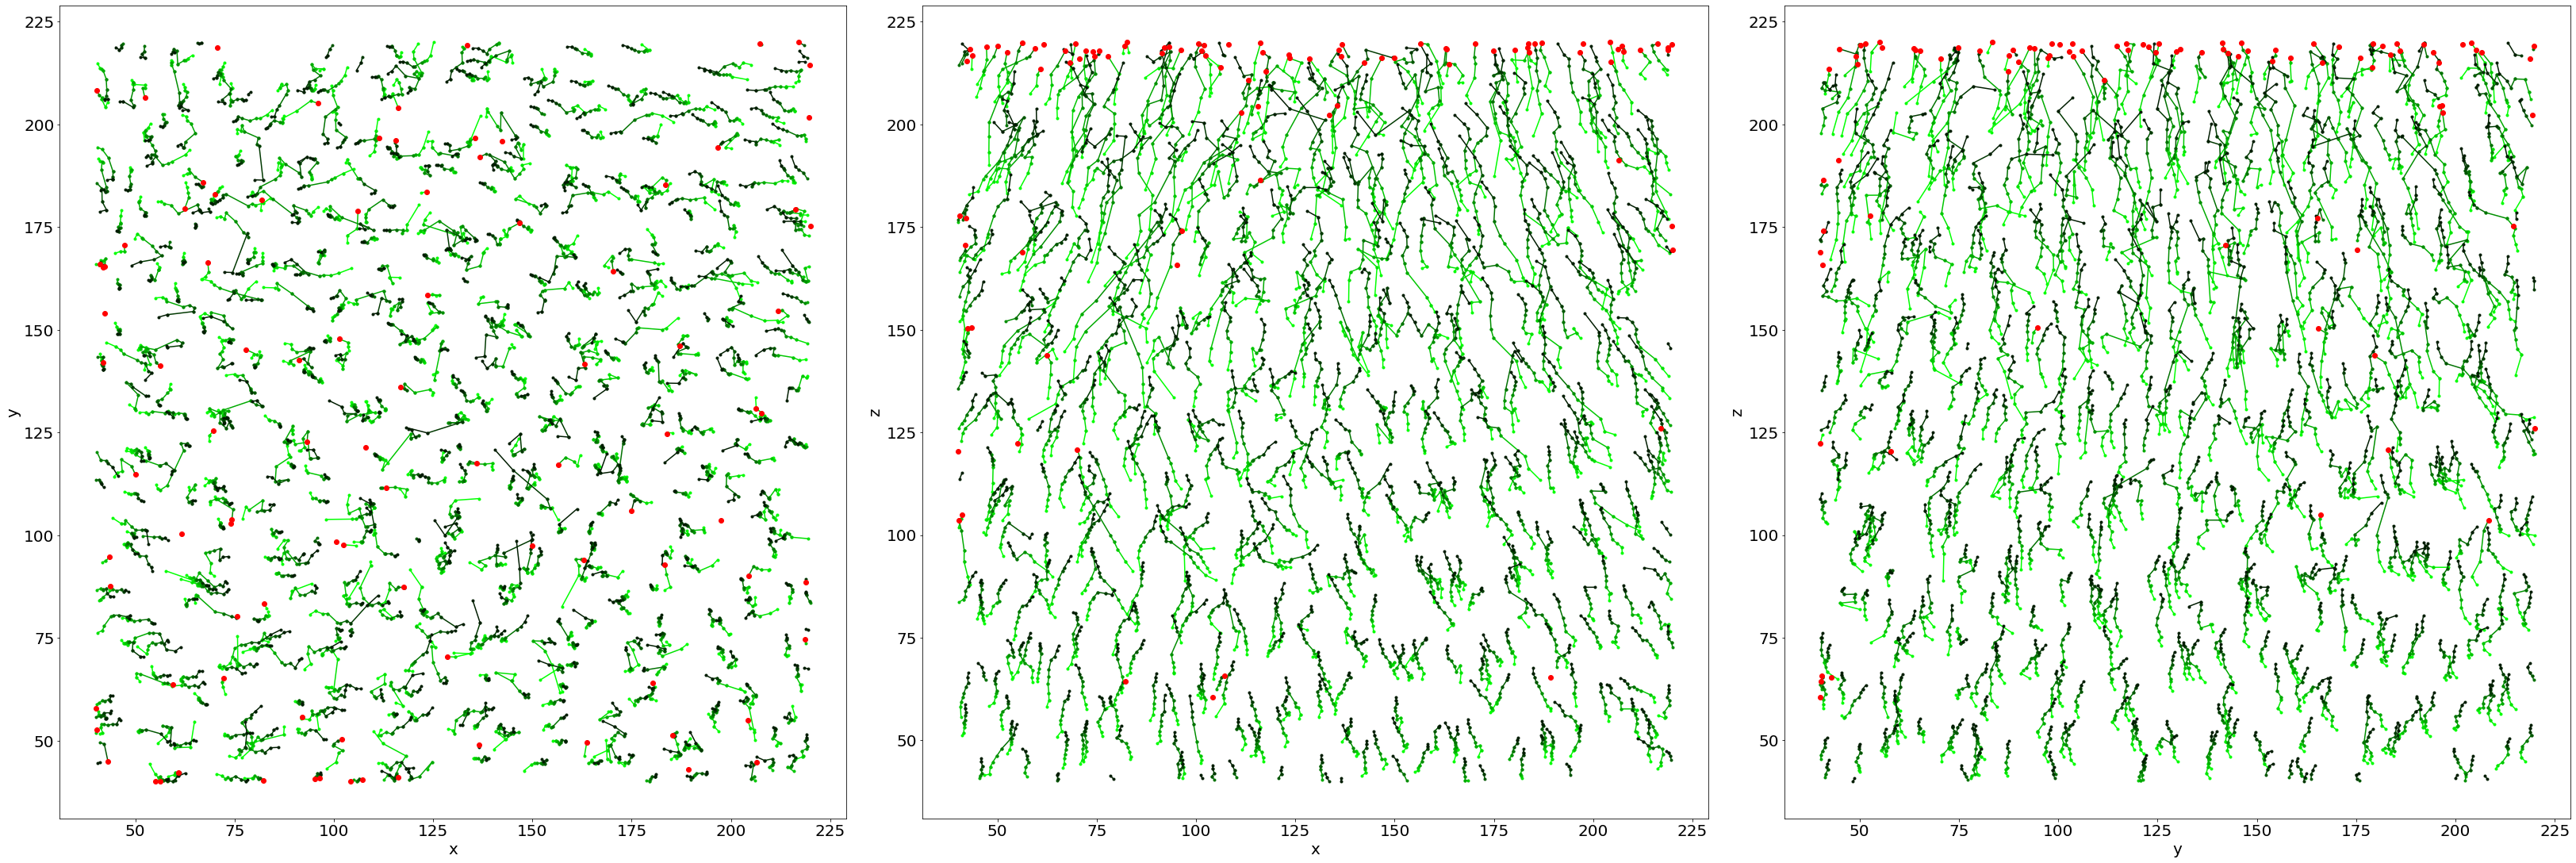

In [41]:
fig, ax = plt.subplots(1,3, figsize = (45, 15), constrained_layout=True)
# Plot of tracked bubbles (green)
for i in range(len(Listx1)):
    ax[0].plot([Listx1[i],Listx2[i]],[Listy1[i],Listy2[i]],'.-', color=lincmap.to_rgba(i))
    ax[1].plot([Listx1[i],Listx2[i]],[Listz1[i],Listz2[i]],'.-', color=lincmap.to_rgba(i))
    ax[2].plot([Listy1[i],Listy2[i]],[Listz1[i],Listz2[i]],'.-', color=lincmap.to_rgba(i))
# Plot of the lost position (red)
for i in range(len(LLostlab)):
    ax[0].plot(LLostX[i],LLostY[i],'ro')
    ax[1].plot(LLostX[i],LLostZ[i],'ro')
    ax[2].plot(LLostY[i],LLostZ[i],'ro')
# Axes
ax[0].set_xlabel('x', fontsize=20); ax[0].set_ylabel('y', fontsize=20)
ax[1].set_xlabel('x', fontsize=20); ax[1].set_ylabel('z', fontsize=20)
ax[2].set_xlabel('y', fontsize=20); ax[2].set_ylabel('z', fontsize=20)

[(40.0, 220.0),
 (40.0, 220.0),
 (40.0, 220.0),
 Text(0.5, 0, 'x'),
 Text(0.5, 0, 'y'),
 Text(0.5, 0, 'z')]

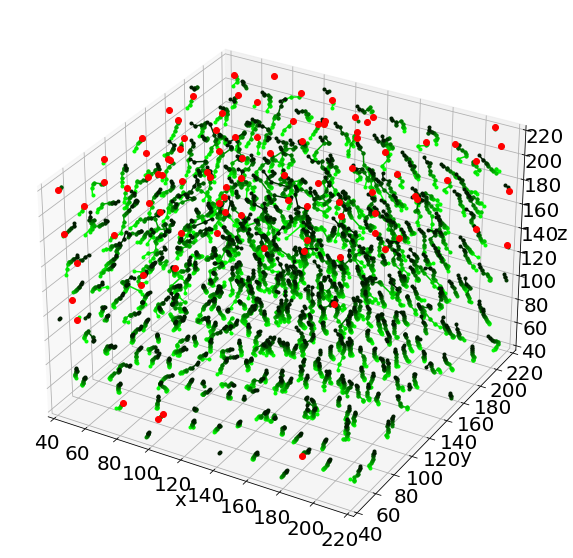

In [42]:
# in 3D!
# Plot of tracked bubbles (green)
ax = plt.figure(figsize = (10, 10)).add_subplot(projection='3d')
for i in range(len(Listx1)):
    for j in range(len(Listx1[i])):
        ax.plot([Listx1[i][j],Listx2[i][j]],
                [Listy1[i][j],Listy2[i][j]],
                [Listz1[i][j],Listz2[i][j]],
                '.-', color=lincmap.to_rgba(i))
# Plot of the lost position (red)
for i in range(len(LLostlab)):
    ax.plot(LLostX[i],LLostY[i],LLostZ[i],'ro')
# Axes
ax.set(xlim=(40, 220), ylim=(40, 220), zlim=(40, 220),
       xlabel='x', ylabel='y', zlabel='z')

### 2) Structured averaged flow field

If structured=True, Grid_Vavg function can be used to obtained cartesian 3D structured average flow field (here respectively along z,y,x)

In [43]:
# structured = True
# tune Range and N parrameters if you wish
Lgrid_z, Coordavg_z,Vavg_z,Vstd_z, Count_z = Grid_Vavg(Coord, v, Range=[40,220,40,220,40,220], N=[1,10,10], NanFill=True, verbose=False, structured=True)
Lgrid_y, Coordavg_y,Vavg_y,Vstd_y, Count_y = Grid_Vavg(Coord, v, Range=[40,220,40,220,40,220], N=[10,1,10], NanFill=True, verbose=False, structured=True)
Lgrid_x, Coordavg_x,Vavg_x,Vstd_x, Count_x = Grid_Vavg(Coord, v, Range=[40,220,40,220,40,220], N=[10,10,1], NanFill=True, verbose=False, structured=True)

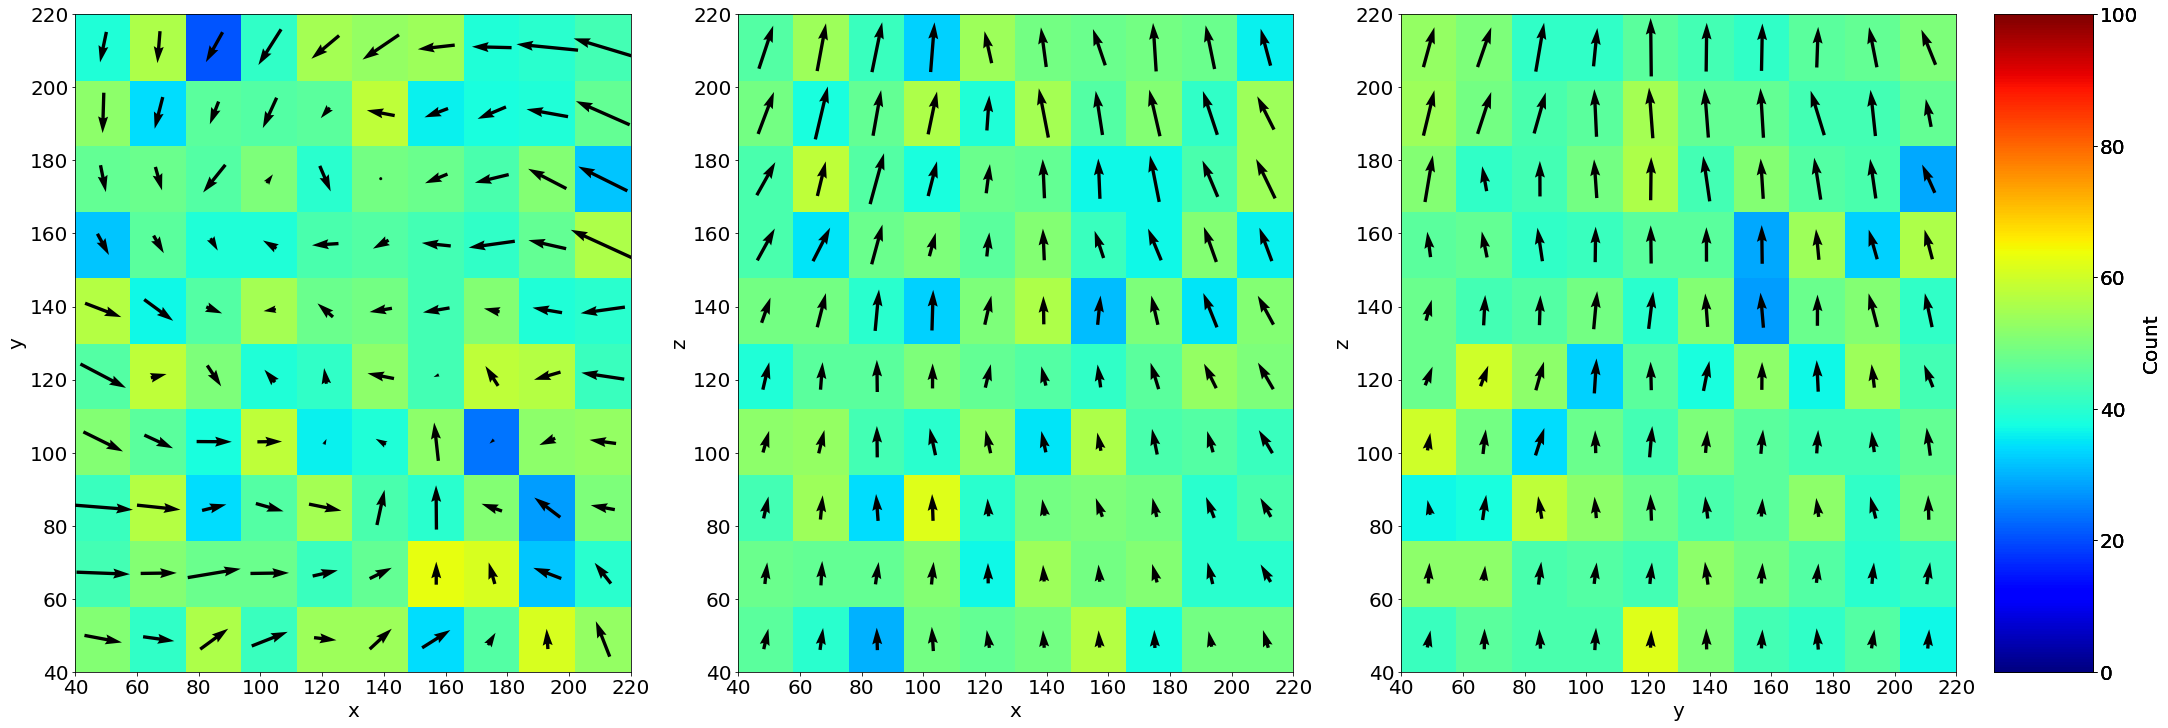

In [44]:
vmin=0   # tune this parrameter if you wish
vmax=100  # tune this parrameter if you wish

fig, ax = plt.subplots(1,3, figsize = (30, 10), constrained_layout=True)
# Colormesh plot of the number of bubble inside the averaging box
neg1=ax[0].pcolormesh(Lgrid_z[2],Lgrid_z[1], Count_z[0,:,:], cmap = 'jet', shading='nearest', vmin=vmin,vmax=vmax)
neg2=ax[1].pcolormesh(Lgrid_y[2],Lgrid_y[0], Count_y[:,0,:], cmap = 'jet', shading='nearest', vmin=vmin,vmax=vmax)
neg3=ax[2].pcolormesh(Lgrid_x[1],Lgrid_x[0], Count_x[:,:,0], cmap = 'jet', shading='nearest', vmin=vmin,vmax=vmax)
# Averaged flow field
ax[0].quiver(Lgrid_z[2],Lgrid_z[1],Vavg_z[0,:,:,2],Vavg_z[0,:,:,1], pivot='mid')
ax[1].quiver(Lgrid_y[2],Lgrid_y[0],Vavg_y[:,0,:,2],Vavg_y[:,0,:,0], pivot='mid')
ax[2].quiver(Lgrid_x[1],Lgrid_x[0],Vavg_x[:,:,0,1],Vavg_x[:,:,0,0], pivot='mid')
# Axes
ax[0].set_xlabel('x'); ax[0].set_ylabel('y')
ax[1].set_xlabel('x'); ax[1].set_ylabel('z')
ax[2].set_xlabel('y'); ax[2].set_ylabel('z')
# Colorbars
fig.colorbar(neg1, label='Count')
fig.colorbar(neg2, label='Count')
fig.colorbar(neg3, label='Count')

### 3) Unstructured averaged flow field

If structured=False, Grid_Vavg function can be used to obtained the same average, but unstructured. 
Here it is convenient for example plotting the velocity along x as a function of the position z

In [45]:
# structured = False
Lgrid, Coordavg,Pavg,Pstd, Count = Grid_Pavg(Coord, 
                                             v[:,0], 
                                             Range=[40,220,40,220,40,220],  # tune this parrameter if you wish
                                             N=[10,1,1],                    # tune this parrameter if you wish
                                             NanFill=True, 
                                             verbose=False, 
                                             structured=False)

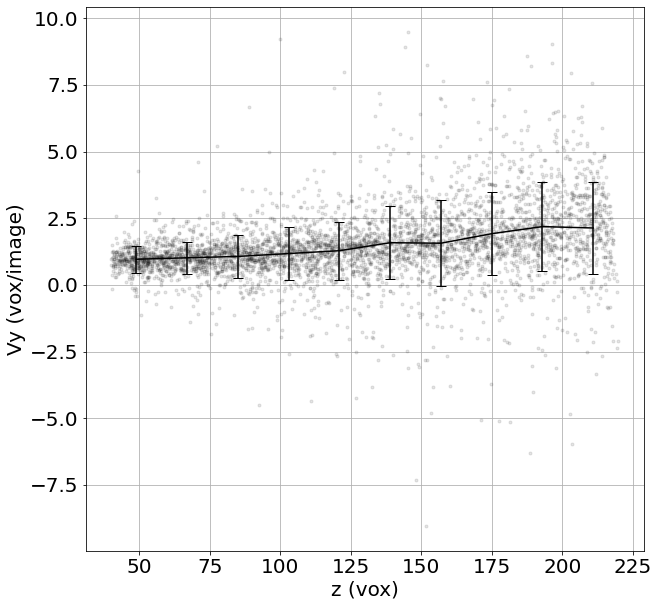

In [46]:
# Do an average over (time,z,y):
ax = plt.figure(figsize = (10, 10))
for vali in range(len(Listx1)):
    plt.plot(Listz1[vali], Listz2[vali]-Listz1[vali],'k.', alpha=0.1)
# Averaged velocity along x as a function of the position z 
plt.errorbar(Lgrid[0], Pavg, yerr=Pstd, capsize=5, color='k')
plt.xlabel('z (vox)', fontsize=20); plt.ylabel('Vy (vox/image)', fontsize=20)
plt.grid(True)

### 4) From Cartesian to Cylindrical coordinates

In [47]:
# Convert Cartesian to Cylindrical: (z,y,x) -> (r,theta,z)
CoordCyl, VCyl = Cartesian2Cylindrical_Vector(Coord, v, CoordAxis = [0,125,125], CylAxisZ = [1,0,0],CylAxisY = [0,1,0],CylAxisX = [0,0,1])

In [48]:
# Do an average over (time,r,z):
Lgrid, Coordavg,Pavg,Pstd, Count = Grid_Pavg(CoordCyl, 
                                             VCyl[:,2], 
                                             Range=[0,110,-np.pi,np.pi,40,220],  # tune this parrameter if you wish
                                             N=[1,10,1],                         # tune this parrameter if you wish
                                             NanFill=True, 
                                             verbose=False, 
                                             structured=False)

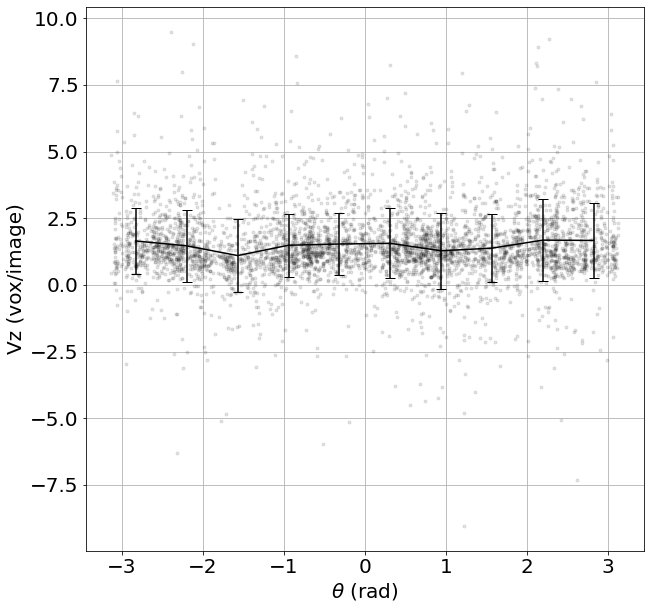

In [49]:
# Velocity along z as a function of the azimuthal angular position theta
ax = plt.figure(figsize = (10, 10))
plt.plot(CoordCyl[:,1], VCyl[:,2],'k.', alpha=0.1)
plt.errorbar(Lgrid[1], Pavg, yerr=Pstd, capsize=5, color='k')
plt.xlabel(r'$\theta$ (rad)', fontsize=20); plt.ylabel('Vz (vox/image)', fontsize=20)
plt.grid(True)

## D) Combine the tracking tables

Get the individual bubble flow path by combining the subsequent image tracking tables.

In [50]:
# Combine the subsequent trackings over the whole series
combined = Combine_Tracking(namesave, dirsave, imrange, verbose=False, endread='.tsv', n0=3)

In [51]:
# Convert lost bubbles data into np.nan
for axis in ['z','y','x']:
    for i in range(len(combined[axis])):
        for j in range(len(combined[axis][i])):
            if combined[axis][i][j]==-1:
                combined[axis][i][j]=np.nan

Text(0, 0.5, 'z')

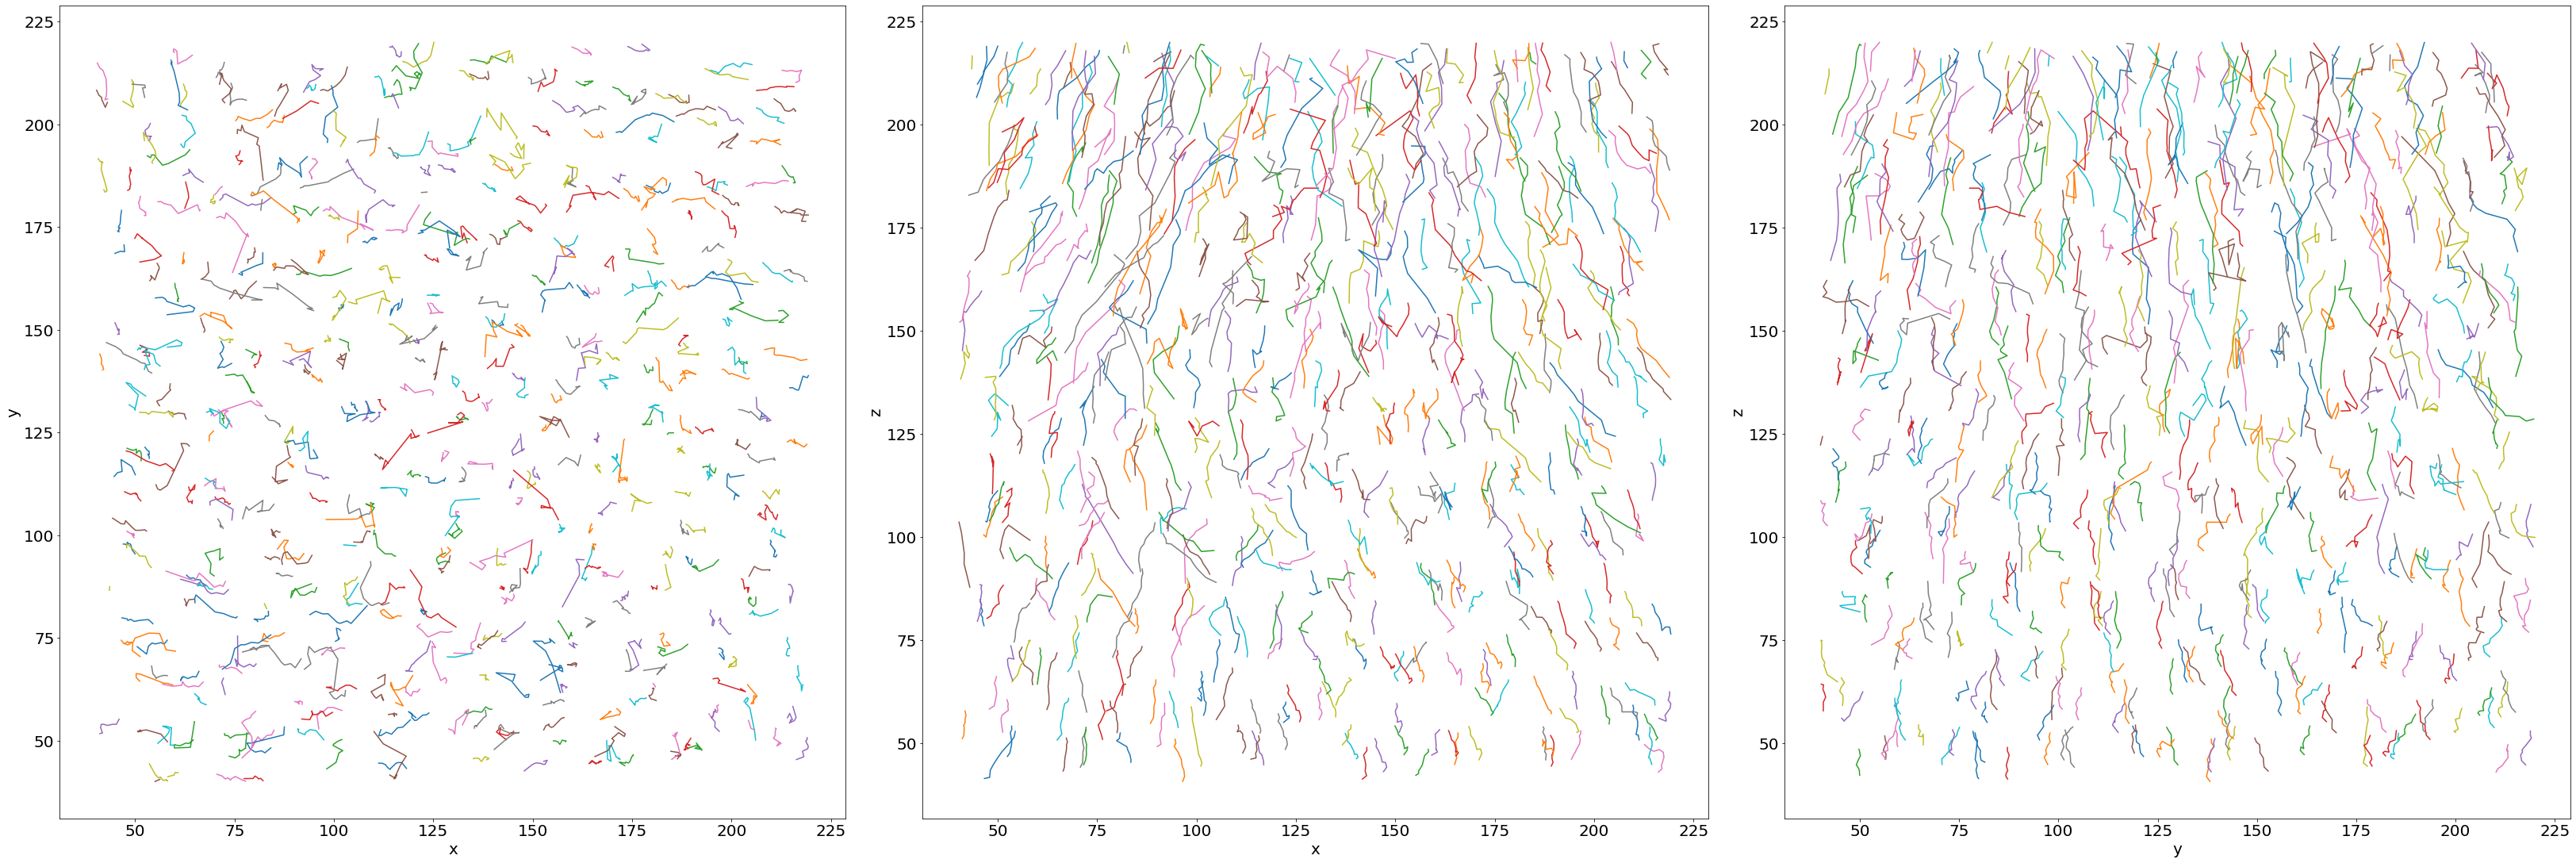

In [52]:
# Show the individual paths by a random color
fig, ax = plt.subplots(1,3, figsize = (45, 15), constrained_layout=True)
for i in range(len(combined['x'])):
    ax[0].plot(combined['x'][i],combined['y'][i])
    ax[1].plot(combined['x'][i],combined['z'][i])
    ax[2].plot(combined['y'][i],combined['z'][i])
# Axes
ax[0].set_xlabel('x'); ax[0].set_ylabel('y')
ax[1].set_xlabel('x'); ax[1].set_ylabel('z')
ax[2].set_xlabel('y'); ax[2].set_ylabel('z')

[(40.0, 220.0),
 (40.0, 220.0),
 (40.0, 220.0),
 Text(0.5, 0, 'x'),
 Text(0.5, 0, 'y'),
 Text(0.5, 0, 'z')]

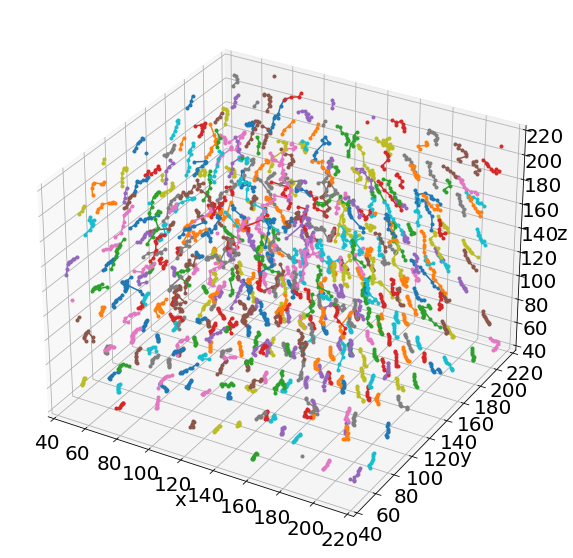

In [53]:
# in 3D!
# Show the individual paths by a random color
ax = plt.figure(figsize = (10, 10)).add_subplot(projection='3d')
for i in range(len(combined['x'])):
    plt.plot(combined['x'][i],combined['y'][i],combined['z'][i], '.-')
# Axes
ax.set(xlim=(40, 220), ylim=(40, 220), zlim=(40, 220),
       xlabel='x', ylabel='y', zlabel='z')

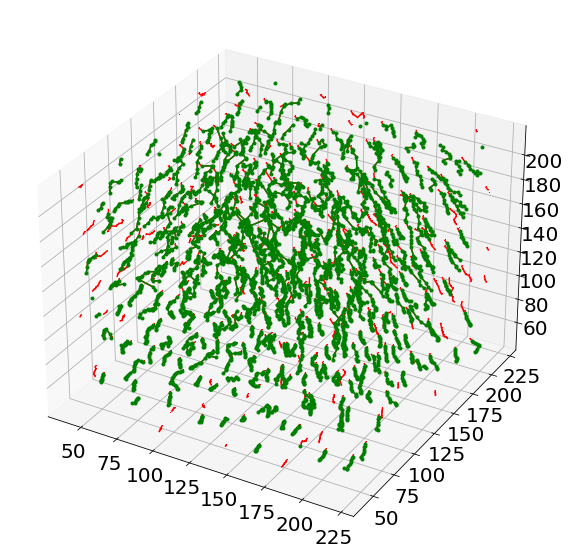

In [54]:
# in 3D!
# Show the non-tracked paths in red
ax = plt.figure(figsize = (10, 10)).add_subplot(projection='3d')
for i in range(len(Listx1)):
    for j in range(len(Listx1[i])):
        ax.plot([Listx1[i][j],Listx2[i][j]],
                [Listy1[i][j],Listy2[i][j]],
                [Listz1[i][j],Listz2[i][j]],
                'r,-')
# Show the tracked paths in green
for i in range(len(combined['x'])):
    ax.plot(combined['x'][i],combined['y'][i],combined['z'][i], 'g.-')

In [55]:
namesave = 'MergedTracking'
dirsave = QuantFolders[3]+'/'

In [57]:
# You can then open it in Paraview! and use the filter "table to points", then "glyph"
Save_Tracking(combined, namesave, dirsave)

For more information see https://foamquant.readthedocs.io/